# Homework 3

## Chen Gengyang

Instructions: 

 1. Please replace "Yourname" above, and in the title of this notebook. 
 2. Import all the libraries you end up using in the cell below. Please only use those libraries which we have used in class (i.e. nltk, collections, pandas, etc.). 
 3. Complete all the exercises, replacing "enter code here" with your code, and "enter markdown here" with your markdown. Annotate with comments (lines beginning with `#`) or with markdown cells, to show how you arrived at your answers.  
 4. From the Kernel menu, select "restart and run all." This will help me to see the output of your answers. 
 5. Email me your completed notebook: jonathan.reeve@columbia.edu


In [1]:
# Import your libraries here. 
import nltk
import pandas as pd
from nltk.corpus import stopwords
import collections
%matplotlib inline

### 1. Find the longest word in _The Moonstone_. 

In [2]:
moonstone = open('moonstone.md').read()

In [3]:
moonstoneTokens = nltk.word_tokenize(moonstone)

In [4]:
moonstoneTokensClean = [token for token in moonstoneTokens if token.isalpha()]

In [5]:
longestLength = 0 
longestWords = []
for token in moonstoneTokensClean: 
    if len(token) > longestLength: 
        longestLength = len(token)
        longestWords = [token]
    if len(token) == longestLength:
        longestWords.append(token)

In [6]:
set(longestWords)

{'misunderstandings'}

### 2. Find the longest sentence in _The Moonstone_. Who is the speaker or narrator of that sentence? 

In [7]:
moonParts = moonstone.split('\n## ')

In [8]:
allNarrators=['GABRIEL BETTEREDGE','MISS CLACK','MATHEW BRUFF','FRANKLIN BLAKE','EZRA JENNINGS','FRANKLIN BLAKE','SERGEANT CUFF','MR. CANDY','GABRIEL BETTEREDGE','finding']
betteredge1,clack,bruff,blake1,jennings,blake2,cuff,candy,betteredge2,finding=[moonParts[i] for i in [2,4,5,6,7,8,9,10,11,12]]
allNarratives=[betteredge1,clack,bruff,blake1,jennings,blake2,cuff,candy,betteredge2,finding]

In [9]:
longestLength=0
longestSent=''
narrIndex=0
for i,narr in enumerate(allNarratives):
    sents=nltk.sent_tokenize(narr)
    for sent in sents:
        if len(sent)>longestLength:
            longestLength=len(sent)
            longestSent=sent
            narrIndex=i

In [10]:
print(longestSent)

On this, the disconnected words,
and fragments of sentences, which had dropped from Mr. Candy in his
delirium, appeared as follows:

“… Mr. Franklin Blake … and agreeable … down a peg … medicine …
confesses … sleep at night … tell him … out of order … medicine … he
tells me … and groping in the dark mean one and the same thing … all the
company at the dinner-table … I say … groping after sleep … nothing but
medicine … he says … leading the blind … know what it means … witty … a
night’s rest in spite of his teeth … wants sleep … Lady Verinder’s
medicine chest … five-and-twenty minims … without his knowing it …
to-morrow morning … Well, Mr. Blake … medicine to-day … never … without
it … out, Mr. Candy … excellent … without it … down on him … truth …
something besides … excellent … dose of laudanum, sir … bed … what …
medicine now.”

There, the first of the two sheets of paper came to an end.


In [11]:
print('The narrator of the longest sentence: ',allNarrators[narrIndex])

The narrator of the longest sentence:  FRANKLIN BLAKE


### 3. Find the longest ngram in _The Moonstone_ that occurs at least twice. What you do notice about it? 

In [12]:
moonTokens = [word for word in nltk.word_tokenize(moonstone)]

In [43]:
longestNgram=[]
isLongest=False
for n in range(20,1,-1):
    ngrams=nltk.ngrams(moonTokens,n)
    counter=dict(collections.Counter(ngrams))
    for count in counter:
        if counter[count]>2:
            longestNgram.append(count)
            isLongest=True
    if isLongest:
        break

#### ⚠️ 20 is too small. And it restricts the finding of the longest ngram.

In [44]:
for ngram in longestNgram:
    print(' '.join(ngram))

on the road to this house , and on no other , that the english gentleman will travel


In [45]:
len(longestNgram[0])

18

#### My Findings
As usual, the ngrams that occur at least twice are some commonly used phrase, proverbs or quotes. However, the length of the longest ngram I found in *The Moonstone* is so long that it seems a little strange. So I search for where the longest ngram comes from.<br><br>
The context of this longest ngram is as followed:
> The Indian said, “Is it **on the road to this house, and on no other, that the English gentleman will travel** to-day?”

> The boy said, “It is **on the road to this house, and on no other, that the English gentleman will travel** to-day.” The Indian put a second question–after waiting a little first. He said: “Has the English gentleman got It about him?”

Then I found that it's a long phrase with an attributive clause. Althought this kind of descriptions is commonly seen in the novel, it seldom occurs twice since no one would repeat such a lengthy description verbatim. Therefore, something strange must occur here. Looking back on the plot, I figured out that it's where indians first showed their magic. For this reason, the poor boy seemed to be under control and repeated the long phrase.<br>
By the way, the word *to-day* should have been counted as well, but it wasn't due to the difference punctuation after the word.

#### Answer

In [42]:
longest=''
for i in range(100,0,-1):
    moonstoneNgrams=nltk.ngrams(moonstoneTokensClean,i)
    mostCommon=collections.Counter(moonstoneNgrams).most_common(1)
    numTimes=mostCommon[0][1]
    ngram=mostCommon[0][0]
    if numTimes>=2:
        longest=ngram
        break
print(longest)

('The', 'valuable', 'assistance', 'which', 'you', 'rendered', 'to', 'the', 'inquiry', 'after', 'the', 'lost', 'jewel', 'is', 'still', 'an', 'unpardoned', 'offence', 'in', 'the', 'present', 'dreadful', 'state', 'of', 'Rachel', 's', 'mind', 'Moving', 'blindfold', 'in', 'this', 'matter', 'you', 'have', 'added', 'to', 'the', 'burden', 'of', 'anxiety', 'which', 'she', 'has', 'had', 'to', 'bear', 'by', 'innocently', 'threatening', 'her', 'secret', 'with', 'discovery', 'through', 'your')


### 4. Find a pattern, of 2-5 words, at least one of which is a part of speech, that occurs at least twice in _The Moonstone_. For example, you might look for JJS-NN (superlative - noun), very-JJ-NNP ("very" - adjective - proper noun), or '.'-CC (a period followed by a coordinating conjunction). What do you notice about your findings?

In [17]:
moonTokens=nltk.word_tokenize(moonstone.lower())

In [18]:
moonTags=nltk.pos_tag(moonTokens)

In [19]:
def popularJJSNN(pairs):
    """ This function takes (token, POS) pairs and 
        looks for patterns like "best friend" 
    """
    matches = []
    for i, pair in enumerate(pairs):
        word=pair[0]
        pos = pair[1]
        if i < len(pairs)-2:
            nextWord = pairs[i+1][0]
            nextWordPOS = pairs[i+1][1]
            if pos == "JJS" and (nextWordPOS == "NN" or nextWordPOS == "NNS"):
                matches.append(' '.join([word, nextWord]))
    counter=dict(collections.Counter(matches))
    popularJJSNN=[(pair,counter[pair]) for pair in counter if counter[pair]>=2]
    return popularJJSNN

In [20]:
popularJJSNN(moonTags)

[('choicest treasures', 2),
 ('best respects', 3),
 ('best thing', 2),
 ('most things', 2),
 ('shortest way', 2),
 ('largest diamonds', 2),
 ('best friend', 3),
 ('earliest convenience', 2),
 ('greatest pleasure', 3),
 ('dearest rachel', 3),
 ('slightest effect', 3),
 ('manifest usefulness', 2),
 ('deepest interest', 2),
 ('slightest interest', 2),
 ('speediest way', 2),
 ('safest person', 2),
 ('earliest period', 2),
 ('worst bitterness', 2),
 ('honest men', 2),
 ('greatest surprise', 2),
 ('most men', 2)]

#### My findings
* The times of phrases in **JJS-NN** pattern are all around 2 or 3, without some particularly
high-frequency phrases. Also, the JJS-NNs I found contain several word groups which are commonly seen in most of the literature work, such as *best thing*, *greatest pleasure*, *most things* and *best friend*.
* Of course, from part of these phrases, such as *choicest treasures*, *largest diamonds*，*deepest interest* and *slightest interest*, we can get a glimpse of the theme of the story, which is centain about the diamond.
* *worst bitterness*, *greatest surprise*, *slightest effect* imply the twists and turns of the plot of the story.

### 5. Write a couple paragraphs where you describe one or two ideas for a final project. What text(s) will you analyze? What technologies will you use? What literary questions do you hope to answer? This doesn't have to be your final decision. 

* **Text**: The Garden Party and Other Stories
* **Objectives**: Syntax Analysis and Semantic Analysis
    * Syntax Analysis
        * use `nltk.ngrams`, `FreqDist` to figure out Katherine Mansfield's favourite ngrams.
        * text similarity among different stories to figure out whether Katherine Mansfield has a fixed writing habits.
            1. use `nltk.word_tokenize` to tokenize words
            2. use `nltk.corpus.stopwords` to remove stopwords
            3. remove the low-frequency words
            4. use `gensim.similarities` to compute the text similarity
    * Semantic Analysis
        * use `nltk.probability` to count the top 10 words that appear most frequently in each story.
        * use `matplotlib` to generate a word cloud of Katherine Mansfield's favourite words.(use `nltk.corpus` to remove the stopwords)

### 6-8. Choose ONE of the following mini-projects to complete. Make sure that in each case, you discuss your results in well-formatted markdown. 

1. Make a big list of color words using WordNet, and then use that to find the predominant color of "The Garden Party," in terms of color words. Then, in one paragraph, interpret your results in terms of the story. Make a visualization of your results. (You can get the colors right with something like pandas `DataFrame.plot(kind="pie", colormap="your-colors-here")`. You might have to read a little about how to use color maps.)

2. Make a function to calculate the ratio of male pronouns to female pronouns. Then use that to test the male/female pronoun ratio of each narrator (you can treat Betteredge's two narratives as one). Create a chart with your results. 

3. Calculate how proportions of parts of speech are different for each narrator in _The Moonstone_. Do any narrators stand out in their usage of certain parts of speech? Discuss your results, and support your findings with a few examples from the text. Create a bar chart with your results. 

4. Categorize the nouns (or verbs, or another POS) of _The Moonstone_, by getting their WordNet hypernyms. (Hint: you can get more specific results than just "entity" by stopping at a pre-specified `max_depth` or `min_depth`.) Create a visualization with your results. 

5. Download a few more Collins novels, either manually or programmatically, using [corpus-db.org](http://corpus-db.org). What are the words that appear in _The Moonstone_ more than other novels of Collins's? (Be sure to use frequencies, rather than raw counts.) If you disregard proper names ('NNP' in terms of POS), what are the remaining distinctive words? 



In [21]:
# 2
malePRP = ['he','his','him','himself']
femalePRP = ['she','her','herself']

In [22]:
def totalCount(lst,para):
    """This function takes a list and a paragraph
        and returns the sum of the occurrence times of each word in the list.
    """
    wordTokens=nltk.word_tokenize(para)
    return sum([wordTokens.count(word) for word in lst])

In [23]:
def calPronounRatio(narr):
    """This function takes a paragraph 
        and calculates the male/female pronoun ratio of this paragraph
    """  
    malePRPCount=totalCount(malePRP,narr)
    femalePRPCount=totalCount(femalePRP,narr)
    if femalePRPCount==0:
        return 'NaN'
    else:
        return totalCount(malePRP,narr)/totalCount(femalePRP,narr)

In [24]:
allNarrators=['GABRIEL BETTEREDGE','MISS CLACK','MATHEW BRUFF','FRANKLIN BLAKE','EZRA JENNINGS','SERGEANT CUFF','MR. CANDY']
betteredge1,clack,bruff,blake1,jennings,blake2,cuff,candy,betteredge2=[moonParts[i] for i in [2,4,5,6,7,8,9,10,11]]
allNarratives=[betteredge1+betteredge2,clack,bruff,blake1+blake2,jennings,cuff,candy]

In [25]:
allRatios=[calPronounRatio(narr) for narr in allNarratives]

In [26]:
df=pd.DataFrame(allRatios,index=allNarrators,columns=['ratio']).T

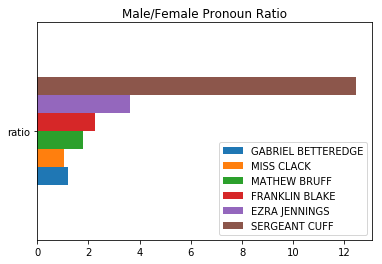

In [27]:
df.plot(kind='barh',title='Male/Female Pronoun Ratio')

In [28]:
df

,GABRIEL BETTEREDGE,MISS CLACK,MATHEW BRUFF,FRANKLIN BLAKE,EZRA JENNINGS,SERGEANT CUFF,MR. CANDY
ratio,1.22021,1.06395,1.77778,2.24198,3.624,12.4545,NaN


#### My finding
Make a function to calculate the ratio of male pronouns to female pronouns. Then use that to test the male/female pronoun ratio of each narrator (you can treat Betteredge's two narratives as one). Create a chart with your results.
* The average ratio is 7.29, which indicates that male pronoun's frequency is significantly higher than female pronoun's. Indeed, the main characters in this story are mostly male. So the result is not surprising.
* At the same time, the ratios of different narrators vary a lot. The highest is nearly three times as many as the lowest. Since personal pronouns are strongly associated with the names of people, I write a function to roughly get the names which appear in each narrative. The function and the result of each narrator are as followed.
    * As the one whose ratio is highest, Sergeant Cuff mentions *Godfrey*, *Ablewhite* and *Luker* a lot. And *Verinder* is the only female he mentions, the time of which is greatly smaller than the males. Considering the reasons for this result from the perspective of plot, when it came to the Sergeant Cuff's narrative, the truth has surfaced. Rachel is cleared of the crime and the person who really stole the moonstone is identified as Mr.Godfrey. As a meticulous sergeant, his narrative naturally revolves around the real thief.
    * The narrative of Mr.Candy is very short, so the data of his narrative may be less representative, and to some extent influence the overall result.
    * The ratio of Betteredge and Miss Clack is the lowest. 
        * Thanks to Rosanna Spearman and Rachel, the male/female pronoun ratio of Betteredge's narrative is not too high. It is not hard to see that in the early period of the story, they are worthy being regarded as protagonists.
        * When it comes to Miss Clack's narrative, there is no sign of Rosanna. The only main female character is Miss Rachel and her mother Miss Verinder, who is the aunt of Miss Clack also appear frequently. Miss Clack actually pays "special" attention to Rachel, which can be seen as bias to some extent. Meanwhile, we can also say that this is her unique perspective as the only female narrator.

In [29]:
def getNames(narr):
    names=[]
    sents=nltk.sent_tokenize(narr)
    for sent in sents:
        words=nltk.word_tokenize(sent)
        validWords=[word for word in words if word[0].isupper() and word not in stopwords.words('English')]
        likelyNames=[pair[0] for pair in nltk.pos_tag(validWords) if pair[1]=='NNP']
        if likelyNames!=[]:
            names.append(','.join(likelyNames))
    return collections.Counter(','.join(names).split(',')).most_common(20)

[('Mr.', 72), ('Godfrey', 38), ('Ablewhite', 29), ('Luker', 24), ('Diamond', 13), ('Verinder', 12), ('Moonstone', 8), ('Miss', 8), ('June', 5), ('London', 5), ('Lady', 3), ('February', 3), ('Bruff', 3), ('Narrative', 2), ('CUFF', 2), ('July', 2), ('Blake', 2), ('Report', 2), ('Coroner', 2), ('Inquest', 2)]


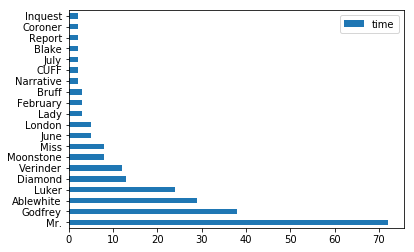

In [30]:
result=getNames(cuff)
print(result)
ratio=[res[1] for res in result]
name=[res[0] for res in result]
df=pd.DataFrame(ratio,index=name,columns=['time'])
df.plot(kind='barh')

In [31]:
getNames(candy)

[('Mr.', 5),
 ('Franklin', 4),
 ('Blake', 4),
 ('CANDY', 2),
 ('Wednesday', 2),
 ('Miss', 2),
 ('Verinder', 2),
 ('Narrative', 1),
 ('Letter', 1),
 ('MR.', 1),
 ('Frizinghall', 1),
 ('September', 1),
 ('Don', 1),
 ('Candy–don', 1),
 ('Diary–in', 1),
 ('God', 1),
 ('Kiss', 1),
 ('Journal', 1),
 ('THOMAS', 1)]

In [32]:
getNames(blake1+blake2)

[('Mr.', 343),
 ('Bruff', 93),
 ('Betteredge', 87),
 ('Franklin', 74),
 ('Rachel', 73),
 ('Candy', 69),
 ('Sergeant', 67),
 ('Blake', 61),
 ('Cuff', 44),
 ('Ezra', 40),
 ('Miss', 35),
 ('Verinder', 35),
 ('London', 33),
 ('Jennings', 33),
 ('Diamond', 31),
 ('Rosanna', 27),
 ('Mrs.', 25),
 ('Gooseberry', 25),
 ('Spearman', 24),
 ('Luker', 23)]

In [33]:
getNames(betteredge1+betteredge2)

[('Mr.', 617),
 ('Franklin', 394),
 ('Sergeant', 233),
 ('Rachel', 199),
 ('Miss', 192),
 ('Rosanna', 168),
 ('Cuff', 146),
 ('Betteredge', 106),
 ('Diamond', 97),
 ('Spearman', 80),
 ('Verinder', 65),
 ('Colonel', 63),
 ('Penelope', 57),
 ('Blake', 55),
 ('London', 52),
 ('Godfrey', 50),
 ('Seegrave', 37),
 ('Mrs.', 36),
 ('Moonstone', 33),
 ('Frizinghall', 33)]

In [34]:
getNames(clack)

[('Mr.', 241),
 ('Godfrey', 111),
 ('Rachel', 77),
 ('Miss', 76),
 ('Ablewhite', 76),
 ('Bruff', 57),
 ('Verinder', 53),
 ('Clack', 48),
 ('Luker', 40),
 ('Blake', 27),
 ('London', 27),
 ('Franklin', 22),
 ('Lady', 20),
 ('Aunt', 18),
 ('Montagu', 13),
 ('Square', 13),
 ('Moonstone', 12),
 ('Street', 10),
 ('Me', 9),
 ('Diamond', 9)]